In [84]:
# import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [68]:
complaints = pd.read_csv("Financial Consumer Complaints.csv")

## Exploratory Data Analysis ##

In [69]:
#complaints.head()

In [70]:
complaints = complaints.drop(['Sub-product', 'Sub-issue', 	'Company public response', 	'Company', 	'ZIP code', 	'Tags', 	'Consumer consent provided?'], axis = 1)

In [71]:
complaints.head(10)

,Complaint ID,Date Sumbited,Product,Issue,State,Submitted via,Date Received,Company response to consumer,Timely response?,Consumer disputed?
0,2824926,2/24/18,Credit card or prepaid card,Closing your account,FL,Web,2/24/18,Closed with explanation,Yes,NaN
1,1515991,8/12/15,Debt collection,Improper contact or sharing of info,CA,Web,8/12/15,Closed with explanation,Yes,No
2,1145261,12/5/14,Bank account or service,Deposits and withdrawals,CA,Referral,12/8/14,Closed with explanation,Yes,No
3,2573763,7/13/17,Mortgage,Trouble during payment process,CA,Web,7/13/17,Closed with explanation,Yes,NaN
4,2573113,7/13/17,Mortgage,Struggling to pay mortgage,NY,Web,7/13/17,Closed with explanation,Yes,NaN
5,2406037,3/27/17,Credit card,Billing disputes,AZ,Referral,3/27/17,Closed with explanation,Yes,No
6,2395777,3/20/17,Debt collection,Cont'd attempts collect debt not owed,GA,Referral,3/21/17,Closed with explanation,Yes,No
7,2850771,3/19/18,Checking or savings account,Managing an account,NV,Referral,3/21/18,Closed with monetary relief,Yes,NaN
8,2376685,3/7/17,Mortgage,Settlement process and costs,AZ,Web,3/7/17,Closed with explanation,Yes,No
9,2825857,2/26/18,Credit card or prepaid card,Closing your account,PA,Web,2/26/18,Closed with non-monetary relief,Yes,NaN


In [72]:
len(complaints)

75513

In [73]:
complaints['Consumer disputed?'].value_counts()

No     31203
Yes     7363
Name: Consumer disputed?, dtype: int64

In [74]:
# we notice that only 31,203 + 7,360 records have data about wheter the consumers disputed. Hence we drop the rows containing NaN values
complaints = complaints[complaints['Consumer disputed?'].notnull()]

In [75]:
len(complaints)

38566

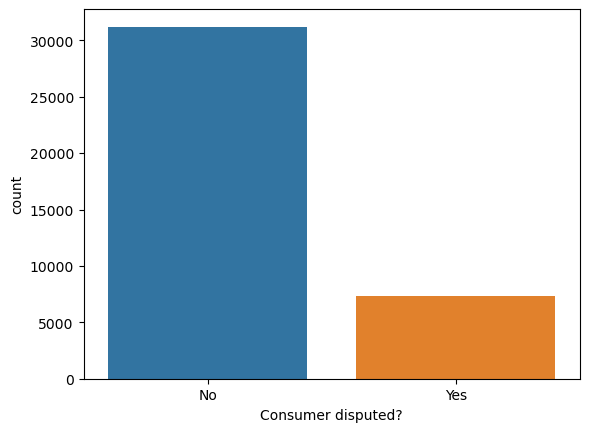

In [76]:
# Visualize the distribution of the target variable
sns.countplot(x='Consumer disputed?', data = complaints)
plt.show() 

In [77]:
# Check for missing values
print(complaints.isnull().sum())

Complaint ID                      0
Date Sumbited                     0
Product                           0
Issue                             0
State                           422
Submitted via                     0
Date Received                     0
Company response to consumer      0
Timely response?                  0
Consumer disputed?                0
dtype: int64


In [78]:
# As we can we there are 422 records where the state vlaue is missing. Let's group all these records under a new category 'OS' 
complaints.State = complaints.State.fillna('OS')

In [79]:
# Check for missing values
print(complaints.isnull().sum())

Complaint ID                    0
Date Sumbited                   0
Product                         0
Issue                           0
State                           0
Submitted via                   0
Date Received                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64


In [39]:
# complaints['State'].value_counts().plot(kind='pie', figsize=(10,10))
#plt.show()

In [40]:
# Visualize relationships between features and target variable
#sns.catplot(x='Product', y='Consumer disputed?', data=complaints)
#plt.show()

In [80]:
# One-hot encode categorical variables
complaints = pd.get_dummies(complaints, columns=['Product', 'Issue', 'State', 'Submitted via', 'Company response to consumer', 'Timely response?'], drop_first=True)

In [81]:
complaints

,Complaint ID,Date Sumbited,Date Received,Consumer disputed?,Product_Checking or savings account,Product_Credit card,Product_Debt collection,Product_Mortgage,Product_Student loan,Issue_Advertising and marketing,...,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Company response to consumer_Untimely response,Timely response?_Yes
1,1515991,8/12/15,8/12/15,No,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,1145261,12/5/14,12/8/14,No,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
5,2406037,3/27/17,3/27/17,No,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6,2395777,3/20/17,3/21/17,No,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8,2376685,3/7/17,3/7/17,No,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75125,1526407,8/19/15,8/19/15,No,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
75127,1415526,6/10/15,6/10/15,Yes,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
75248,1390668,5/25/15,5/25/15,No,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
75417,1988731,6/28/16,6/29/16,No,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [82]:
# Split the data into training and testing sets
X = complaints.drop(['Complaint ID', 'Consumer disputed?', 'Date Received', 'Date Sumbited'], axis=1)
y = complaints['Consumer disputed?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Implement linear regression model
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

In [86]:
# Evaluating the model
y_pred = regressor.predict(X_test)
print("R-squared:", regressor.score(X_test, y_test))

R-squared: 0.804252009333679
